In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

print("First 5 rows of the dataset:")
display(iris_df.head())


First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
from google.colab import files
import pandas as pd
import io

# Upload the file(s) from your local system
uploaded = files.upload()

# Assuming you upload a single CSV file, get its name
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}"')
  # Read the CSV file into a pandas DataFrame
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

print("Dataset loaded successfully.")

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv"
Dataset loaded successfully.


In [37]:
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 105 samples
Testing set size: 45 samples


In [39]:
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
knn_model.fit(X_train, y_train)

print("KNN model trained successfully with n_neighbors = 3.")

KNN model trained successfully with n_neighbors = 3.


In [40]:
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



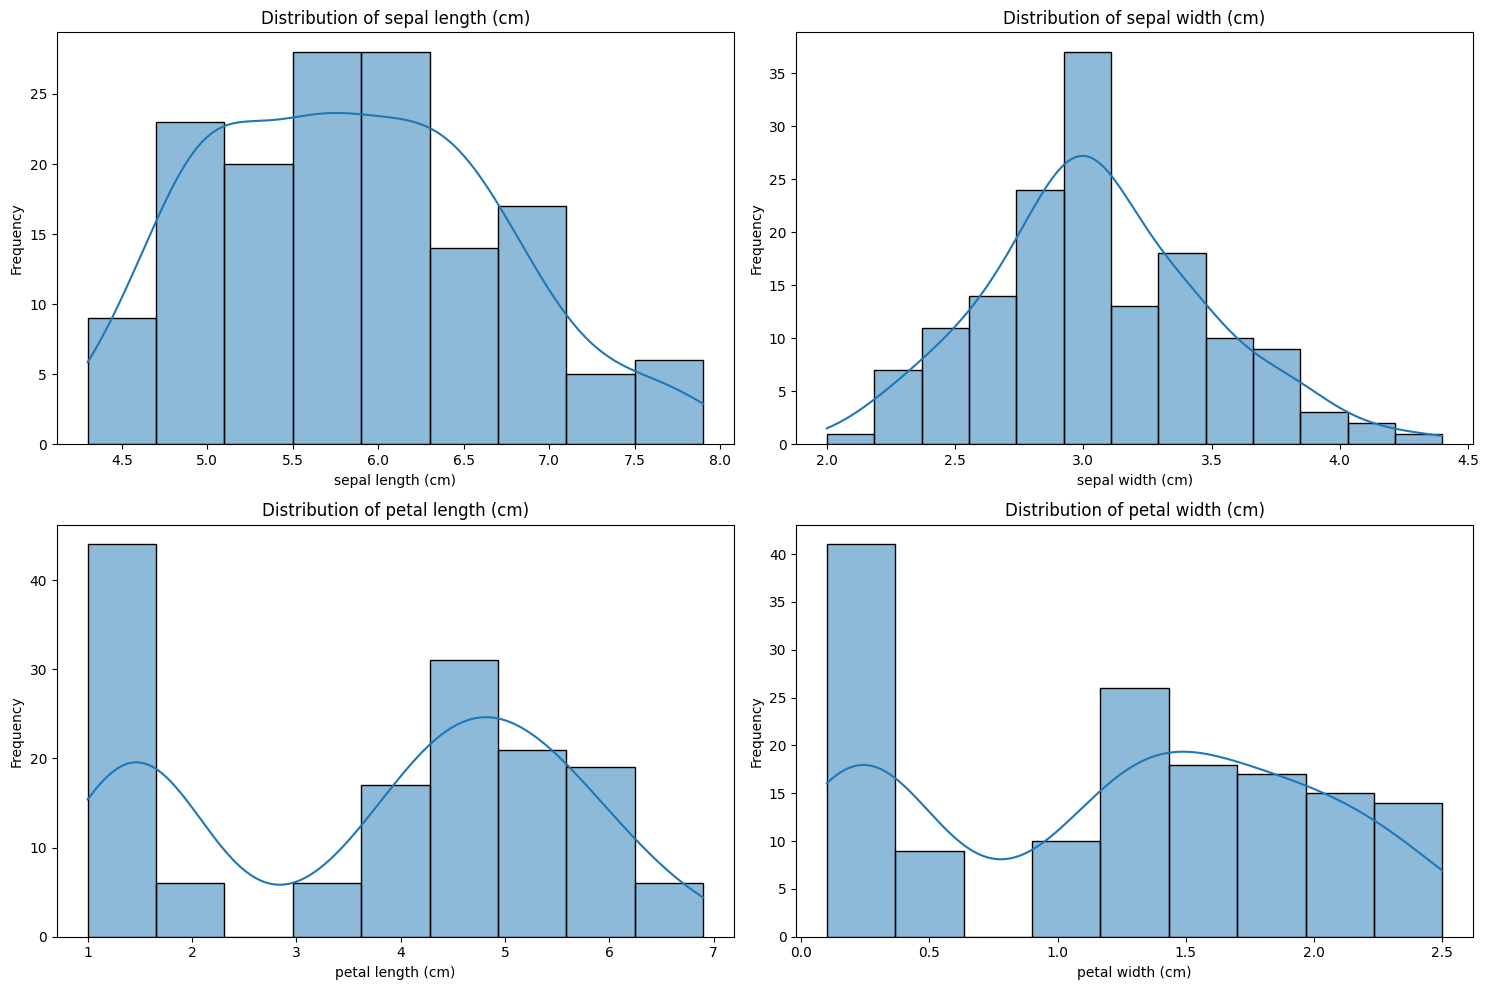

/tmp/ipython-input-2295300667.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris_df, palette='viridis')


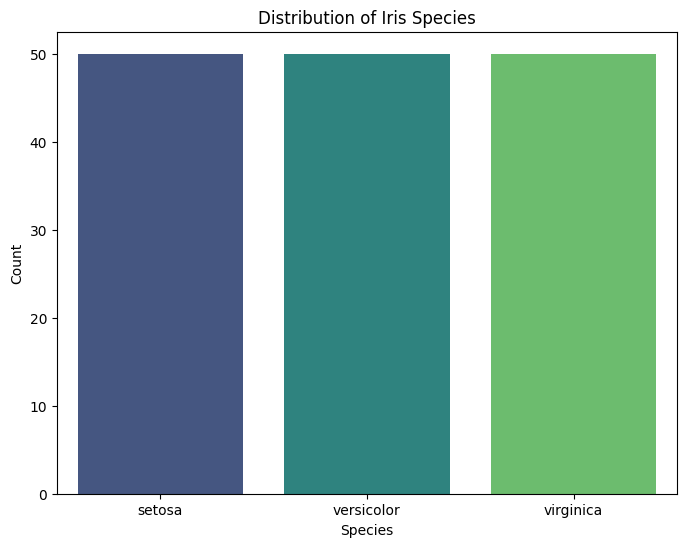

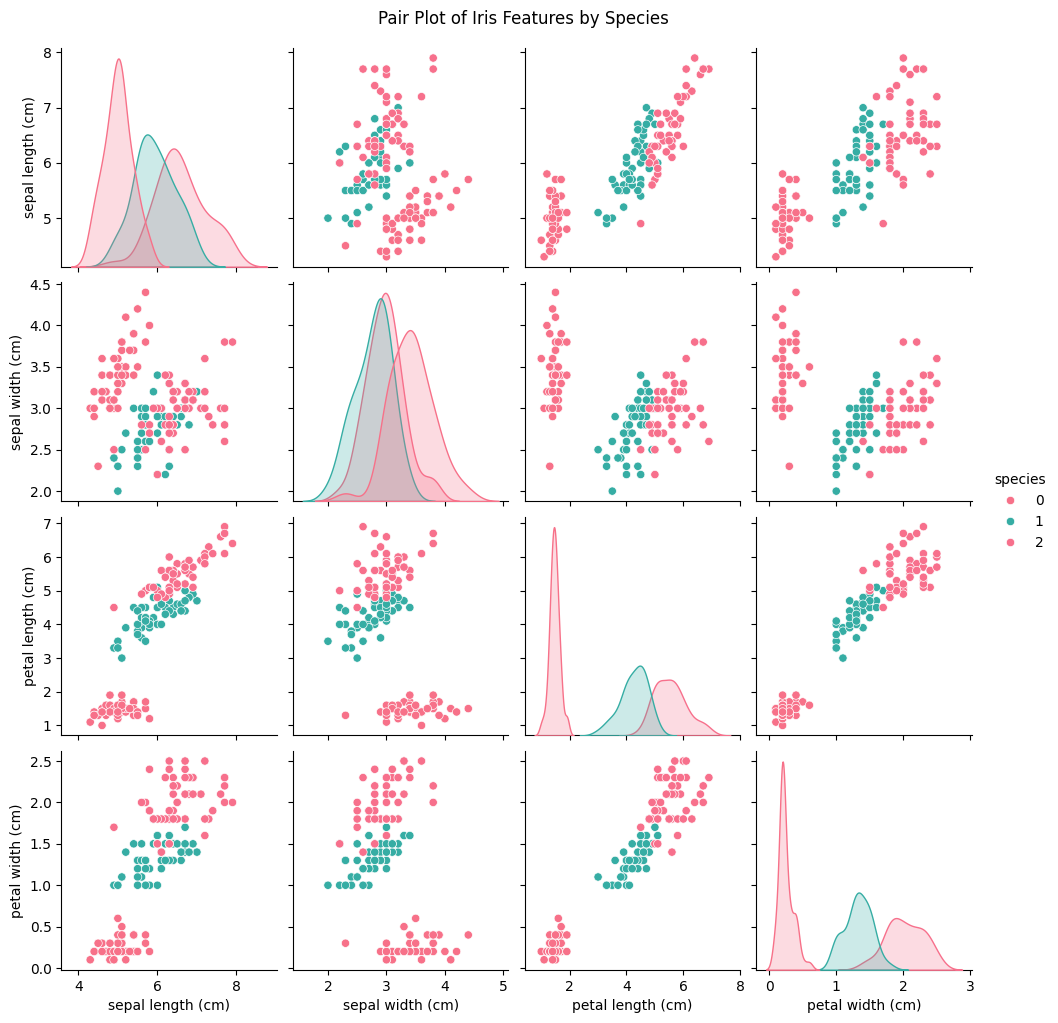

Histograms, bar plot, and pair plot generated successfully.


In [43]:
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Create histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Generate a bar plot for the 'species' column
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris_df, palette='viridis')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Create a pair plot
sns.pairplot(iris_df, hue='species', palette='husl')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust suptitle position
plt.show()

print("Histograms, bar plot, and pair plot generated successfully.")